## Solução do problema térmico 2-D

- Método das diferenças finitas

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections

__Problema:__ (Transiente) 

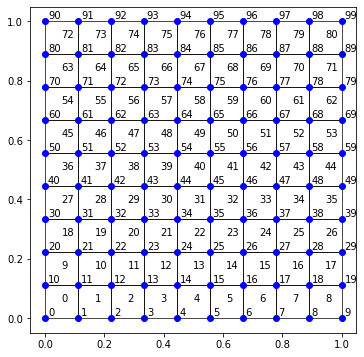

In [2]:
# Dados da malha
Lx = 1.0                                             
Ly = 1.0                                             
nx = 10                                             
ny = 10                                              
npoints = nx*ny                                      
nq = (nx-1)*(ny-1)
Deltax = Lx/(nx-1)
Deltay = Ly/(ny-1)
dt = 0.001

# Dados do problema
rho = 1.0 # densidade do material
cv = 1.0 # capacidade termica
k = 1.0 # condutividade termica
alpha = k/(rho*cv) # difusividade termica
Q = 0.0 # fonte de calor

xv = np.linspace(0,Lx,nx)
yv = np.linspace(0,Ly,ny)

[X,Y] = np.meshgrid(xv,yv)
X = np.reshape(X,npoints)
Y = np.reshape(Y,npoints)

IEN = np.zeros( (nq,4),dtype='int' )
for i in range(0,nq):
    j = i//(nx-1)
    IEN[i] = [i+j,i+1+j,i+(nx+1)+j,i+(nx)+j]

# plot malha de quadriláteros
xy = np.stack((X, Y), axis=-1)
verts = xy[IEN]
plt.figure(figsize=(6, 6))
ax=plt.gca()
pc = matplotlib.collections.PolyCollection(verts,edgecolors=('black',),
                                                 facecolors= 'None',
                                                 linewidths=(0.7,))
ax.add_collection(pc)
plt.plot(X,Y,"bo")

for i in range(0,npoints):
    plt.text(X[i]+0.01,Y[i]+0.01,str(i))

# loop em todos os elementos
for e in range(0,IEN.shape[0]):
    v1,v2,v3,v4 = IEN[e]
    # calculo do centro de massa, ou centro geometrico
    Xm = (X[v1]+X[v2])/2.0
    Ym = (Y[v1]+Y[v3])/2.0
    plt.text(Xm,Ym,str(e))

ax.set_aspect('equal')
plt.show()

In [3]:
# Pontos C.C
cc1 = [];cc2 = [];cc3 = [];cc4 = []; cc = []; noncc = []

for i in range(0,npoints):
    if Y[i] == min(Y):
        cc1.append(i)
        cc.append(i)
    elif Y[i] == max(Y):
        cc3.append(i)
        cc.append(i)
    elif X[i] == min(X) and Y[i]>min(Y) and Y[i]<max(Y):
        cc4.append(i)
        cc.append(i)
    elif X[i] == max(X) and Y[i]>min(Y) and Y[i]<max(Y): 
        cc2.append(i)
        cc.append(i)
    else:
        noncc.append(i)

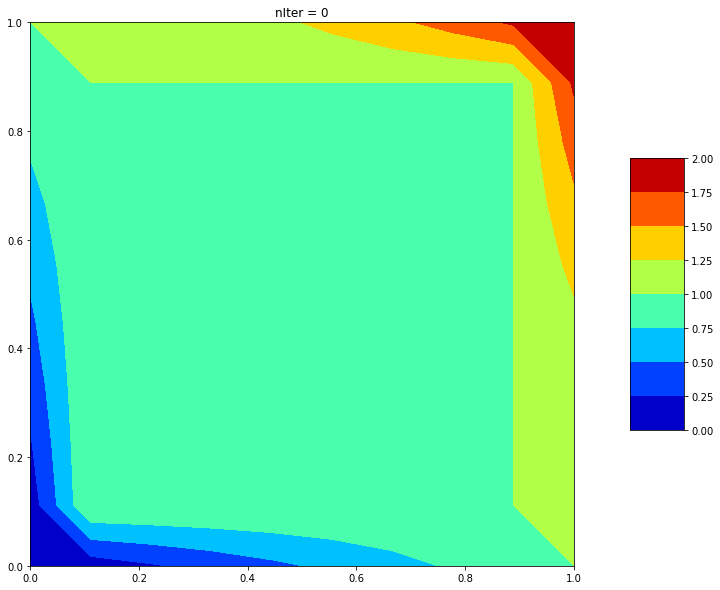

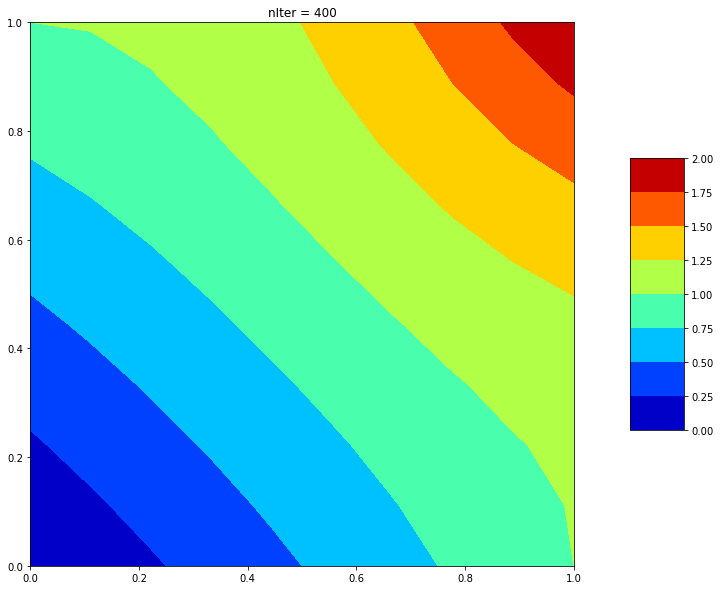

In [4]:
T = 1*np.ones( (npoints),dtype='float' ) # temperatura inicial

for i in cc1:
    T[i] = X[i]
for i in cc2:
    T[i] = Y[i]*Y[i] + 1
for i in cc3:
    T[i] = X[i]**2 + 1
for i in cc4:
    T[i] = Y[i]

nIter = 400

# plot da solucao
plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.set_aspect('equal')
xq = X.reshape(ny,nx)
yq = Y.reshape(ny,nx)
solq = T.reshape(ny,nx)
surf = ax.contourf(xq,yq,solq,cmap='jet')
plt.colorbar(surf,shrink=0.5, aspect=5)
plt.title(f'nIter = 0')
plt.show()
    
for n in range(0,nIter):
    Tn = T.copy()
    for i in noncc:
        T[i] = Tn[i] + \
             dt*alpha*(Tn[i+1]-2*Tn[i]+Tn[i-1])/(Deltax**2) + \
             dt*alpha*(Tn[i+nx]-2*Tn[i]+Tn[i-nx])/(Deltay**2) + \
             dt*Q/(rho*cv)

# plot da solucao
plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.set_aspect('equal')
xq = X.reshape(ny,nx)
yq = Y.reshape(ny,nx)
solq = T.reshape(ny,nx)
surf = ax.contourf(xq,yq,solq,cmap='jet')
plt.colorbar(surf,shrink=0.5, aspect=5)
plt.title(f'nIter = {nIter}')
plt.show()